# Sequential Minimal Optimization (SMO)

In [17]:
from sklearn import svm,metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from sklearn.model_selection import train_test_split
from scipy.linalg import eigh


mnist=pd.read_csv('output.csv')
xdata=mnist.iloc[:,1:].values
ydata=mnist.iloc[:,0].values
print(xdata.shape)
print(ydata.shape)

(11981, 784)
(11981,)


### Draw sample image

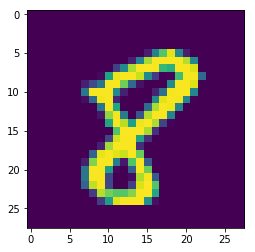

(7188, 784)


In [18]:
row, col = xdata.shape
# we convert each 784 entry rows into a row col 2D matrix of 28* 28 to visualize the image
a = np.zeros((int(math.pow(col, 0.5)), int(math.pow(col, 0.5))), np.int32)
r, c = a.shape

# randomly selecting a row for visualization
rand = random.randint(0, row)
img = xdata[rand]
test = ydata[rand]
#creating 2d image from pixel values
for i in range(r):
    for j in range(c):
        a[i][j] = xdata[rand][i * c + j]

plt.imshow(a)
plt.show()

Y = ydata
x_temp, x_test, y_temp, y_test = train_test_split(xdata, Y, test_size=0.2, random_state=50)
x_train, x_validation, y_train, y_validation = train_test_split(x_temp,y_temp,test_size=0.25,random_state=50)
print(x_train.shape)



reduced dimension shape= (7188, 256)
1000 256


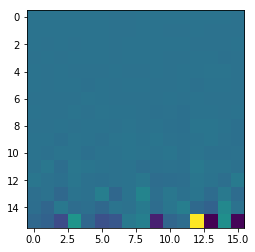

In [19]:
##applying pca to reduce the dimension of the images
def red_dim(X,new_dim=2):
    x=X.T
    m=x.shape[1]-1
    mean=np.mean(x,axis=1).reshape(-1,1)
    x=x-mean
    cov=np.cov(x.T)
    lam, V = eigh(cov,eigvals=(m - new_dim + 1, m))
    eigen_face = V.T @ x.T
    eigen_face.shape
    signature = (eigen_face @ x)
    return signature.T

x_train=red_dim(x_train,256)
print("reduced dimension shape=",x_train.shape)
plt.imshow(x_train[0].reshape(16,16))


mean=x_train.mean(axis=0)
std=x_train.std(axis=0)
x_train=(x_train-mean)/std
##converting 3 into -1 and 8 into 1
y_train = (y_train.reshape(-1,1) > 4) * 1 + (y_train.reshape(-1,1) < 4) * -1

x_test=x_train[1000:1500,:]
y_test=y_train[1000:1500,:]
x_train=x_train[:1000,:]
y_train=y_train[:1000,:]
m,n=x_train.shape
print(m,n)

In [22]:
def fx(x_train,alpha,y_train,xi,bias):
    return ((alpha*y_train*(x_train@xi.T)).sum(axis=0)+bias).reshape(-1,1)

c=5
tol=0.05
max_passes=20
alpha=np.zeros(m).reshape(-1,1)
bias=0
passes=0
while(passes<max_passes):
    num_changed_alphas=0
    for i in range(m):
        ssum=fx(x_train,alpha,y_train,x_train[[i]],bias)
        errori=ssum-y_train[i,0]
        if(((y_train[i,0]*errori < ((-1)*tol)) and (alpha[i,0]<c)) or ((y_train[i,0]*errori > tol) and (alpha[i,0]>0))):
            k=i
            while(k==i):
                k=random.randint(0,m-1)
            ssum=fx(x_train,alpha,y_train,x_train[[k]],bias)
            
            errork=ssum-y_train[k,0]
            oldalpha1=alpha[i,0]
            oldalpha2=alpha[k,0]
            if(y_train[i,0]!=y_train[k,0]):
                L=max(0,oldalpha2-oldalpha1)
                H=min(c,c+oldalpha2-oldalpha1)
            else:
                L=max(0,oldalpha1+oldalpha2-c)
                H=min(c,oldalpha1+oldalpha2)
            if(L==H):
                continue
            #n=2*np.inner(np.array(x_train[i]),np.array(x_train[k]))
            #n=n-np.inner(np.array(x_train[i]),np.array(x_train[i]))
            #n=n-np.inner(np.array(x_train[k]),np.array(x_train[k]))
            n = (2 * (x_train[i] @ x_train[k])) - (x_train[i] @ x_train[i]) - (x_train[k] @ x_train[k])
            print("n = {}".format(n))
            if(n>=0):
                continue
            temp=oldalpha2-(y_train[k,0]*(errori-errork)/n)
            if(temp>H):
                alpha[k]=H
            elif(temp>=L and temp<=H):
                alpha[k]=temp
            else:
                alpha[k]=L
            if(np.abs(alpha[k,0]-oldalpha2)<tol):
                continue
            alpha[i]=alpha[i,0]+(y_train[i,0]*y_train[k,0]*(alpha[k,0]-oldalpha2))
            b1=bias-errori-y_train[i,0]*(alpha[i,0]-oldalpha1)*(x_train[i]@x_train[i])
            -y_train[k,0]*(alpha[k,0]-oldalpha2)*(x_train[i]@x_train[k])
            b2=bias-errork-y_train[i,0]*(alpha[i,0]-oldalpha1)*(x_train[i]@x_train[k])
            -y_train[k,0]*(alpha[k]-oldalpha2)*(x_train[k]@x_train[k])
            if(alpha[i,0]>0 and alpha[i,0]<c):
                bias=b1
            elif(alpha[k,0]>0 and alpha[k,0]<c):
                bias=b2
            else:
                bias=(b1+b2)/2
            print("bias=",bias)
            num_changed_alphas=num_changed_alphas+1
            print("num_changed_alpha=",num_changed_alphas)
    if(num_changed_alphas==0):
        passes=passes+1
    else:
        passes=0


n = -561.6173492249595
n = -447.42065993990093
n = -357.5508972663218
n = -349.57419669963053
n = -584.6872555836891
n = -548.4584521750194
n = -546.6515658272431
n = -380.0143981651813
n = -804.2107242676198
n = -502.96888645770775
n = -492.3790497235992
n = -431.13718095359195
n = -567.26928835709
n = -408.6477969565523
n = -616.3878283961475
n = -422.15037194319297
n = -398.65069787225025
n = -564.177191168427
n = -705.6405098441285
n = -460.66280273411803
n = -445.8739648884115
n = -380.5825247570547
n = -346.12949599246406
n = -397.108388936216
n = -495.51214363564145
n = -410.7066453139712
n = -434.81527487866344
n = -408.2303664257755
n = -541.7874044779803
n = -391.23930849477154
n = -475.74866776243084
n = -333.5632027762607
n = -485.08996548532934
n = -567.6076622924352
n = -457.3241907167757
n = -358.12756200746816
n = -493.93062591552143
n = -340.5718108782428
n = -494.86841515105084
n = -479.0359132411119
n = -458.34475885061767
n = -467.17604276029033
n = -470.40304901242

n = -323.5383694691973
n = -1038.3843557931732
n = -417.35019184093505
n = -471.6662497698808
n = -275.1192932506304
n = -707.2037803236735
n = -408.02303259710504
n = -750.2159355705426
n = -347.56649034243804
n = -439.1817094334009
n = -579.5616783209155
n = -421.86445427511137
n = -361.03239670752
n = -447.1085235853645
n = -682.041274267796
n = -413.03069754355784
n = -458.22298493409664
n = -483.56076546041777
n = -417.7103294072542
n = -417.7161844075386
n = -453.3029462382937
n = -492.9971817283068
n = -398.32488327141624
n = -602.2928789219579
n = -773.6481875178936
n = -439.9110618435974
n = -420.74818814446974
n = -424.0765486181316
n = -481.6205495507527
n = -497.7805521191832
n = -500.4388954303295
n = -444.0615989052534
n = -605.2113276142832
n = -336.72260552060925
n = -489.99947809520745
n = -332.3525018998814
n = -805.8551307165903
n = -523.2287549103629
n = -369.813067457242
n = -701.1494940960283
n = -389.05210689026217
n = -512.0502419219472
n = -928.9096285173363
n 

n = -363.34896687728985
n = -664.0650607991638
n = -461.19222782044517
n = -428.2359095335261
n = -328.032414331375
n = -441.2346932932632
n = -489.4544969311487
n = -379.22489212849325
n = -460.7911249397846
n = -519.2273420689907
n = -416.5808921613143
n = -957.3867537383425
n = -405.59952033113495
n = -534.5416832486196
n = -582.1261869448622
n = -398.256400773368
n = -383.6650636391528
n = -652.9371863978268
n = -748.8442224603045
n = -507.1830378772503
n = -533.6900532553325
n = -553.7262671557771
n = -429.1758382607593
n = -583.2691139623751
n = -492.9185585134288
n = -501.1201919671975
n = -562.0875042711868
n = -479.20983597259055
n = -499.4184984361691
n = -438.71412524239236
n = -737.0037462805712
n = -391.93260135763745
n = -641.8199259938887
n = -595.5799008677167
n = -563.7007528742657
n = -648.073835072038
n = -364.40248154353674
n = -414.76270946855175
n = -414.5146095818178
n = -411.52617434716853
n = -493.1536247549997
n = -602.1885291525139
n = -477.14135804365515
n =

n = -304.63540157610015
n = -723.7089402525485
n = -369.2326519191706
n = -378.40674897358986
n = -611.6188347650592
n = -511.76153284974265
n = -606.2952252280122
n = -855.9433001039446
n = -419.2443375182267
n = -416.8650017658199
n = -570.0771545074158
n = -447.9713640326903
n = -430.9774659255417
n = -561.0389689985896
n = -601.399783314689
n = -344.5363070553997
n = -453.3943988352544
n = -554.9239780489439
n = -423.46105843143687
n = -475.6439346637024
n = -554.9695593064313
n = -780.4302403576219
n = -550.4561071257256
n = -414.3839748040393
n = -889.7190254589692
n = -695.6043673648098
n = -407.47080931932
n = -425.9556699951516
n = -441.958450422292
n = -502.522418415941
n = -537.4122897991831
n = -377.099092192641
n = -459.229091104198
n = -409.8240619450663
n = -296.15317194521424
n = -418.6931469945538
n = -534.6069965431757
n = -420.5058783886881
n = -554.9248583199787
n = -608.0382715051912
n = -400.6378719740421
n = -422.50069393768416
n = -605.944864675798
n = -529.9969

n = -451.6395817663173
n = -433.5906034664681
n = -340.5733940493463
n = -444.10181223719326
n = -611.802384207798
n = -422.9855226873521
n = -910.6000450890829
n = -492.668576998813
n = -327.49929331406975
n = -484.2744707212917
n = -485.8843262583954
n = -402.9777839260209
n = -496.33766739867895
n = -366.73854335132535
n = -467.0671758464099
n = -427.1478178132485
n = -444.9966231100054
n = -657.6613216746316
n = -494.9354025219177
n = -350.56026931431205
n = -593.222734878444
n = -400.7476271634331
n = -362.3586483175721
n = -451.56585054545
n = -452.40032677855174
n = -528.3807496902803
n = -416.39721670438416
n = -461.31803164972746
n = -482.49221101139983
n = -497.87653720420894
n = -360.6855301498996
n = -401.63005178034604
n = -311.9733230405104
n = -412.7244199734874
n = -480.8311637223705
n = -490.6813750149231
n = -406.1494550622457
n = -514.802883712349
n = -484.47140644434
n = -409.1169437506013
n = -330.58081417240714
n = -503.7683739155061
n = -709.3722209157189
n = -85

n = -506.409612024849
n = -326.4026394985949
n = -709.869865527812
n = -429.96562803047425
n = -409.42403657547607
n = -1251.2576344233707
n = -530.9737458620225
n = -446.57054085664777
n = -677.7750173275622
n = -618.278532446612
n = -558.588873736188
n = -950.7034193342814
n = -567.9317766263171
n = -526.0872949996126
n = -298.93586044951684
n = -373.83312242169825
n = -531.5596241410319
n = -350.10650701966927
n = -570.4133856089727
n = -599.1897133557053
n = -809.328078564362
n = -393.98210466715364
n = -539.1607953471457
n = -472.84923657508534
n = -361.58831373286796
n = -390.147069363393
n = -491.3668146186613
n = -422.56480326613814
n = -336.7167819424501
n = -482.3691157546699
n = -486.9300002427953
n = -479.6708917535774
n = -430.5109463966428
n = -594.0501190311643
n = -492.54706452168284
n = -352.80117625361197
n = -444.904302144281
n = -677.7029147326102
n = -737.6829607774201
n = -450.8152042279943
n = -405.2585900615559
n = -582.9417056908886
n = -450.6264007885374
n = -

n = -381.3841896386109
n = -545.5799125626666
n = -505.9340963806191
n = -400.8266146786035
n = -850.0335249479182
n = -380.4819329768178
n = -595.3653006197347
n = -568.787796561222
n = -428.94174921165927
n = -623.771497985889
n = -615.2108876534244
n = -573.7161902706059
n = -477.1283432833724
n = -657.9782685493753
n = -752.6568482832388
n = -606.6429473925862
n = -521.2409493846209
n = -484.56992341506634
n = -373.9320148759376
n = -527.5795925816769
n = -543.8914785962618
n = -373.19480259689374
n = -681.2237369653124
n = -607.2781157918314
n = -433.29702094095524
n = -475.6011214161395
n = -686.688547903248
n = -408.4907105624045
n = -542.2868935669692
n = -558.7177239752134
n = -432.5354410443918
n = -473.4700245064842
n = -393.8992000393507
n = -268.0807250413633
n = -611.5331020411323
n = -651.5468291971722
n = -540.8722572074905
n = -386.8911170946942
n = -490.75253841989684
n = -572.4541394749567
n = -436.3835361975594
n = -464.9871174330237
n = -607.1263791485123
n = -401.

n = -483.955235974747
n = -668.2626404901982
n = -547.8102625059786
n = -551.3237266031115
n = -448.77066641969986
n = -723.4712333909735
n = -560.4248394332546
n = -581.1872244867558
n = -634.4577807882317
n = -578.2038285154516
n = -409.00744440002006
n = -415.72479454920006
n = -371.07840845919196
n = -567.505264426302
n = -608.851899234385
n = -520.7524232636212
n = -402.23354737790197
n = -452.05684649734457
n = -416.85189818717674
n = -757.8393152997679
n = -487.19714339961064
n = -499.22818548588543
n = -501.92089534591196
n = -525.4576842099151
n = -577.8912284668756
n = -355.08709682773724
n = -773.497314812148
n = -470.9473805445776
n = -440.5470401619955
n = -677.8397047082299
n = -417.07761797420585
n = -435.1530064642644
n = -399.60239858492844
n = -616.0755741202579
n = -430.7181808628289
n = -385.4431834733115
n = -423.4420740722875
n = -790.6655671592234
n = -590.3149533336167
n = -617.0579720573228
n = -431.34176197251446
n = -642.817195499798
n = -562.5142714766878
n 

n = -529.8342744162611
n = -400.4329692813573
n = -402.04725373360463
n = -655.5925401289392
n = -389.7573762886178
n = -580.5479372487392
n = -481.2104565437688
n = -434.75215432580706
n = -465.00644692732294
n = -473.8861111216132
n = -445.63509707612593
n = -396.7565769502571
n = -505.09574921172697
n = -719.3178921650874
n = -478.25286367803835
n = -413.1348653582433
n = -635.9848767818405
n = -557.1160263602305
n = -471.6829731469521
n = -359.8442617101627
n = -565.0355509569708
n = -564.3558909096647
n = -338.21388883993154
n = -471.8164692506047
n = -798.7148629353695
n = -734.251235087013
n = -430.9213747949858
n = -1284.5976404546718
n = -573.8727052809998
n = -356.7170513332362
n = -568.9786777977504
n = -548.9135010930213
n = -501.20847065717896
n = -633.9739823140944
n = -617.3447399546276
n = -693.7906104308015
n = -417.24632413815084
n = -469.6114363028374
n = -491.62029894087556
n = -470.63335250891896
n = -433.85231378731476
n = -513.8055979215569
n = -409.2295076304656

n = -566.6353515491801
n = -497.7085969165188
n = -696.622915728889
n = -357.4435115406736
n = -407.6817963288099
n = -423.494021230949
n = -574.4948291716092
n = -542.7032609667409
n = -570.9774536977318
n = -438.0021668883789
n = -626.1431073590855
n = -393.3670395681852
n = -464.71792683056754
n = -428.50042687426054
n = -355.8669216924719
n = -593.0700437944395
n = -571.7463739062302
n = -350.43085048462734
n = -587.9021811231
n = -350.2525003528393
n = -396.2482137989757
n = -485.51852311628556
n = -381.8657195461184
n = -390.8387072867777
n = -369.2340012177094
n = -596.2108969856794
n = -484.34094607224984
n = -665.487900697407
n = -534.5535838262709
n = -436.38541289767267
n = -377.32178252589836
n = -294.37543727330194
n = -410.4666112984937
n = -529.7900697616408
n = -308.00763648724353
n = -456.83719251461866
n = -645.0482768050479
n = -461.7263742382993
n = -273.7305190947531
n = -503.20075306609215
n = -684.3795345018141
n = -639.36766969841
n = -375.6793999702213
n = -389

n = -782.8943907244185
n = -408.36843588319874
n = -470.6294359882071
n = -681.3096954903056
n = -290.01525699655764
n = -805.617514457825
n = -468.8201591967536
n = -389.91794687216765
n = -569.0670337102905
n = -523.4961080478142
n = -585.086123526456
n = -377.52777962549334
n = -619.5933446870392
n = -445.6022688020575
n = -569.2179557014442
n = -435.5054579082107
n = -589.7328763515194
n = -780.8231923361375
n = -533.4801653990538
n = -573.098519180666
n = -537.1947630530555
n = -497.6233332155175
n = -415.44309509254174
n = -543.2598895428555
n = -680.279788711493
n = -490.8728689745078
n = -493.63427899118176
n = -1102.3447166822557
n = -506.47742313036315
n = -478.31055527135186
n = -425.56520454298357
n = -2157.470754437283
n = -438.15148501882476
n = -394.27544426425754
n = -331.90603130938473
n = -598.64412286241
n = -731.8324496126054
n = -473.33909422759103
n = -384.3332759586579
n = -342.86897238961194
n = -626.0308456002567
n = -381.2949328707716
n = -573.5338768538548
n 

KeyboardInterrupt: 

In [23]:
print(alpha,bias)
def func(xtrain, x_i, alphas, ytrain, b):
    return ((alphas * ytrain * (xtrain @ x_i.T)).sum(axis = 0)+b).reshape(-1,1)
hypothesis=func(x_train,x_test,alpha,y_train,bias)
hypothesis=(hypothesis>0)*1-1*(hypothesis<0)
acc=(1-(hypothesis!=y_test)*1).sum()/y_test.shape[0]*100
print("Accuracy=",acc)

[[6.19507542e-03]
 [1.99060610e-03]
 [8.07503713e-05]
 [1.74335123e-03]
 [0.00000000e+00]
 [5.22775510e-03]
 [0.00000000e+00]
 [5.93553101e-03]
 [0.00000000e+00]
 [2.58641902e-03]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [2.35689040e-03]
 [3.20685522e-04]
 [0.00000000e+00]
 [3.96831779e-03]
 [4.61215072e-03]
 [0.00000000e+00]
 [9.50549653e-03]
 [3.36685991e-03]
 [2.06988616e-03]
 [0.00000000e+00]
 [3.55134354e-03]
 [0.00000000e+00]
 [3.29482670e-03]
 [2.69066102e-03]
 [1.08251745e-03]
 [6.50093358e-04]
 [5.99543873e-04]
 [1.59835307e-03]
 [2.91206243e-04]
 [0.00000000e+00]
 [8.07798793e-03]
 [1.49861370e-04]
 [0.00000000e+00]
 [1.39915583e-03]
 [2.97217695e-04]
 [1.03297174e-03]
 [3.31188959e-03]
 [4.75415331e-03]
 [2.71051919e-03]
 [7.11335996e-03]
 [0.00000000e+00]
 [0.00000000e+00]
 [5.86191849e-03]
 [5.45336622e-04]
 [0.00000000e+00]
 [0.00000000e+00]
 [1.69375904e-03]
 [1.34150052e-03]
 [2.95389614e-03]
 [4.82445812e-03]
 [0.000000